# Let's estimate some things together
## Goals:
<span style="font-size:1.2em;">
    
1. Motivate why Bayesian methods are helpful when running low-powered experiments
    
2. Get some intuition about Bayesian A/B testing

3. Examples of Beta distribution and Normal distribution used in A/B testing

4. "Save your company money"



## So stats was never my strong point, so there's a lot I'm learning!
<span style="font-size:1.2em;">In the past, I thought of power mostly for making sure that you are likely to detect an effect when one actually exists</span>

<span style="font-size:1.2em;">(i.e. P(reject null | H1) </span>

<span style="font-size:1.2em;">Now that we run experiments where measurement is challenging, I'm learning that it matters a lot for inference too.</span>
![errors](../notebooks/nopower.jpg)

<span style="font-size:1.8em;">Say we're trying to measure a parameter, theta, like the effect of book clubs on salary:</span>

![errors](../notebooks/plots_gif.gif)

<span style="font-size:1.2em;">
    
<b>Here we have a noisy measurement (sampling distribution of the mean is large, std deviation ~8)</b>

* The true effect size is 2.
* The shaded red regions are the rejection regions under the null hypothesis of 0 effect size
* We ran an experiment and got a point estimate of 17, which has a p-value of 6% for H1, so not that rare
</span>

<span style="font-size:1.2em;">
    
<b>If we run an experiment, we're sampling from the sampling distribution with mean 2. If we get a result that means we reject the null hypothesis, then we are in the red shaded regions. What's going on in those regions?</b>

* Some fraction of the rejection region corresponds to a negative effect size, so we'd make the *wrong* decision in those cases
* Both parts of the rejection region have effect sizes larger than abs(1.96*8), implying that the point estimate would be a dramatic over-estimate of the effect size
    
 </span>

![mental](../notebooks/mental.gif)

# In other words (Gelman's):
## Type M(agnitude) errors: 
<span style="font-size:1.2em;">Claim with confidence that theta is small in magnitude when it is in fact large, or by claim with confidence that theta is large in magnitude when it is in fact small.</span>

## Type S(ign) errors: 
<span style="font-size:1.2em;">Claim with confidence that theta is positive in sign when it is in fact negative, or by claim with confidence that theta is negative in sign when it is in fact positive. </span>

[A link for the figure, and more](https://alexanderetz.com/2015/05/21/type-s-and-type-m-errors/)



# Decision making under Uncertainty - Intuition
<span style="font-size:1.2em;">We want to still extract meaningful decisions from our experiments and take a conservative approach to reduce errors in decisionmaking and estimation.</span>

<span style="font-size:1.2em;">Oh, Hello Bayes</span>
![Bayes Rule](../notebooks/bayserule.png)

<span style="font-size:1.2em;">Use Bayesian approaches to estimation to "regularize" our experimental results by anchoring on a prior</span>

# Probabilities and the Beta distribution

In [17]:
from numpy import random
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import Image
sns.set_style('white')

In [16]:
def get_posterior(data, prior_a=1, prior_b=1):
    """
    This function calculates the posterior distribution, given a beta prior
    `data` is the dataframe of experimental data
    `prior_a` is the prior parameter for alpha
    `prior_b` is the prior parameter for beta
    returns the posterior distribution with updated parameters
    """
    # The update rule is simple for a beta distribution,
    # a_new = a_prior + n_observations_of_a
    # b_new = b_prior + on_bservations_of_b
   
    posterior_a = prior_a + data.heads.values[0]
    posterior_b = prior_b + data.tails.values[0]
    posterior = st.beta(posterior_a,posterior_b)
    return posterior

def get_estimate(data):
    """
    This function calculates the experimental measurement, given an experiment
    returns a beta distribution with paremeters alpha and beta
    """
    
    a = data.heads.values[0]
    b = data.tails.values[0]
    experiment = st.beta(a,b)
    return experiment

def plot_everything():
    sns.lineplot(x=x, y=prior.pdf(x),     ax=ax, color='lightblue', linewidth=3, label='prior')
    sns.lineplot(x=x, y=estimate.pdf(x),  ax=ax, color='blue',      linewidth=3, label='estimate')
    sns.lineplot(x=x, y=posterior.pdf(x), ax=ax, color='green',     linewidth=3, label='posterior')
    plt.xlabel('Probability of Getting Heads')
    plt.ylabel('Probability Density')
    plt.title('Measuring Probability of Heads')
    plt.show()
    return None

## Let's flip some coins to estimate the proability of getting heads

<span style="font-size:1.2em;">If we really had no clue if coins were fair, we could have a non-informative prior where all probabilities were equally likely. </span>

<span style="font-size:1.2em;">Say we then flip a coin 10 times and get 7 heads. What's our estimate of P(heads) using only that data?</span>

<span style="font-size:1.2em;">What if we felt that there should be roughly equal probability that P(heads) is any value between 0 and 1?</span>

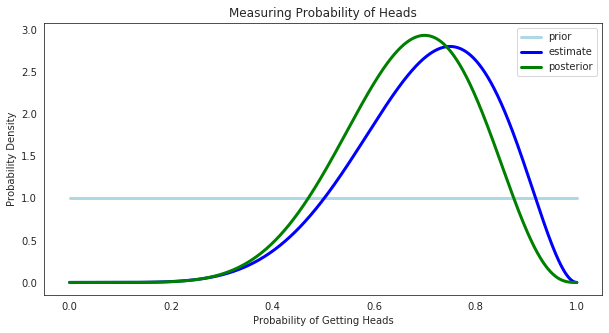

In [26]:
x = np.linspace(0,1,1000)
df = pd.DataFrame({'heads':[7], 'tails':[3]}) 

prior_heads = 1
prior_tails = 1

prior = st.beta(prior_heads,prior_tails)
estimate = get_estimate(df)
posterior = get_posterior(data=df,prior_a=prior_heads, prior_b=prior_tails)

fix, ax = plt.subplots(figsize=(10,5))
plot_everything()

<span style="font-size:1.2em;">In this case our estimate overpowers the prior, because we had a very weak prior.</span>

**We can get a 95% credible interval from our posterior estimate**


In [28]:
print('Best Estimate of p(heads) = {}%'.format(round(100*posterior.mean(),2)))
print('Credible Interval: ({}%,{}%)'.format(round(100*posterior.interval(0.95)[0],2), 
                                            round(100*posterior.interval(0.95)[1],2)))

Best Estimate of p(heads) = 66.67%
Credible Interval: (39.03%,89.07%)


<span style="font-size:1.8em;"><b>That's silly, I'm more confident that P(heads) = 50%</b></span>



<span style="font-size:1.5em;">We can change our prior to be tighter around 50%. Beta(10,10) has a 95% credible interval that covers about (30% to 70%), Let's try that!</span>

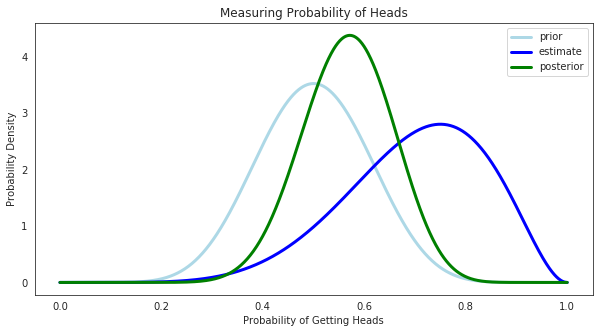

In [14]:
x = np.linspace(0,1,1000)
df = pd.DataFrame({'heads':[7], 'tails':[3]}) 

prior_heads = 10
prior_tails = 10
prior = st.beta(prior_heads,prior_tails)
estimate = get_estimate(df)
posterior = get_posterior(data=df,prior_a=prior_heads, prior_b=prior_tails)

fix, ax = plt.subplots(figsize=(10,5))
plot_everything()

<span style="font-size:1.5em;"> Here the prior is stronger, so our evidence does not shift the distribution as far from E[P(heads)] = 50% </span>

<span style="font-size:1.5em;">Try out some priors and experiments combinations on your own: </span>

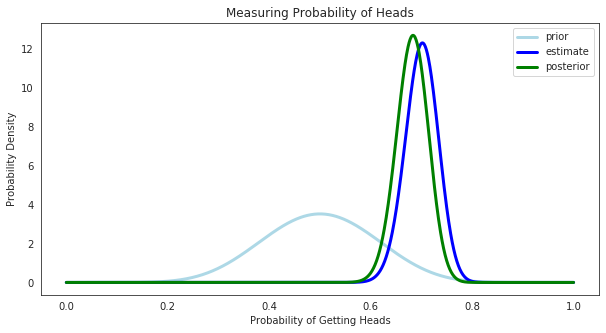

In [15]:
df = pd.DataFrame({'heads':[140], 'tails':[60]}) 

prior_heads = 10
prior_tails = 10
prior = st.beta(prior_heads,prior_tails)
estimate = get_estimate(df)
posterior = get_posterior(data=df,prior_a=prior_heads, prior_b=prior_tails)

fix, ax = plt.subplots(figsize=(10,5))
plot_everything()

<span style="font-size:1.5em;">If we keep flipping and collecting data, our prior will be overwhelmed by the data, which is what we want since more data should mean more confidence in our estimate</span>

## Continuous variables and the Normal distribution
<span style="font-size:1.8em;">Now let's take a business metric like, the cost per incremental subscriber (CPIS).</span>

<span style="font-size:1.5em;">The sampling distribution of the mean is a normal distribution, because assumptions. </span>

<img style="float: left;" src="../notebooks/CodeCogsEqn.png">


In [7]:
def get_posterior_normal(data, prior_effect=0, prior_sigma=5):
    # See http://www.ams.sunysb.edu/~zhu/ams570/Bayesian_Normal.pdf
    # The update rule is a bit more math for a normal prior, but it's just some algebra
    
    inv_variance = (1/prior_sigma**2) + (1/data.sigma.values[0]**2)
    sigma_new = 1/np.sqrt(inv_variance)

    effect_new = (1/inv_variance)*(prior_effect/prior_sigma**2 + data.effect.values[0]/data.sigma.values[0]**2)

    posterior = st.norm(effect_new,sigma_new)
    return posterior

def get_estimate_normal(data):
    
    effect = data.effect.values[0]
    sigma = data.sigma.values[0]
    experiment = st.norm(effect,sigma)
    return experiment

def plot_everything_again():
    sns.lineplot(x=x, y=prior.pdf(x), ax=ax, color='lightblue', linewidth=3, label='prior')
    sns.lineplot(x=x, y=estimate.pdf(x), ax=ax, color='blue', linewidth=3, label='estimate')
    sns.lineplot(x=x, y=posterior.pdf(x), ax=ax, color='green', linewidth=3, label='posterior')
    plt.xlabel('CPIS_B - CPIS_A')
    plt.ylabel('Probability Density, P(B-A)')
    plt.title('Measuring Change in CPIS')
    plt.show()
    return None

x = np.linspace(-15,15,1000)

<span style="font-size:1.2em;"><b>Now we run experiments where we compare the CPIS between two treatments or strategies</b>

A conservative approach may be to assume that any changes to the status quo have zero effect. </span>

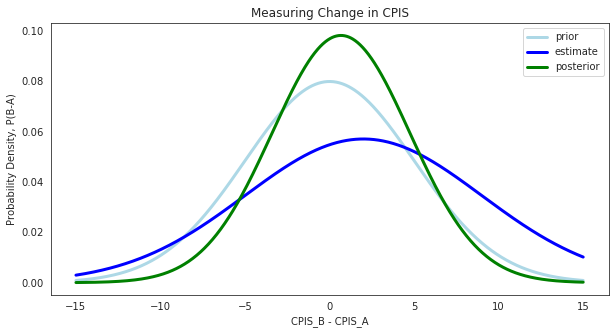

In [8]:
df = pd.DataFrame({'effect':[2], 'sigma':[7]}) 

prior_effect = 0 
prior_sigma = 5

prior = st.norm(prior_effect,prior_sigma)
estimate = get_estimate_normal(df)
posterior = get_posterior_normal(data=df,prior_effect=prior_effect, prior_sigma=prior_sigma)

fix, ax = plt.subplots(figsize=(10,5))

plot_everything_again()

<span style="font-size:1.5em;">What if we collected 2 times more data and sigma -> sigma/sqrt(2)</span>


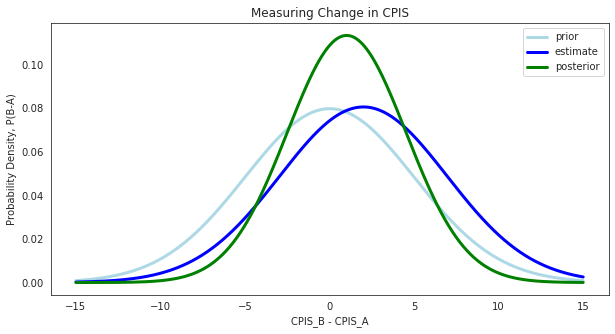

In [9]:
df = pd.DataFrame({'effect':[2], 'sigma':[7/np.sqrt(2)]}) 

prior_effect = 0 
prior_sigma = 5

prior = st.norm(prior_effect,prior_sigma)
estimate = get_estimate_normal(df)
posterior = get_posterior_normal(data=df,prior_effect=prior_effect, prior_sigma=prior_sigma)

fix, ax = plt.subplots(figsize=(10,5))

plot_everything_again()

<span style="font-size:1.5em;">What if we got even <b>MOAR</b> data?</span>


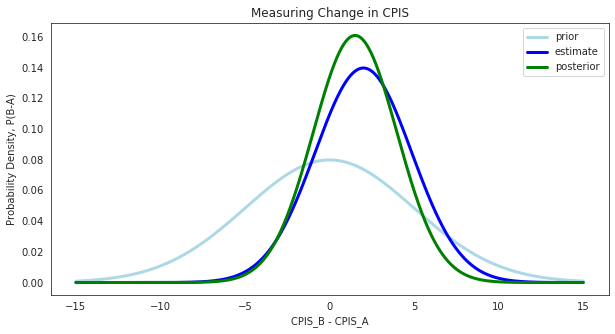

In [10]:
df = pd.DataFrame({'effect':[2], 'sigma':[7/np.sqrt(6)]}) 

prior_effect = 0 
prior_sigma = 5

prior = st.norm(prior_effect,prior_sigma)
estimate = get_estimate_normal(df)
posterior = get_posterior_normal(data=df,prior_effect=prior_effect, prior_sigma=prior_sigma)

fix, ax = plt.subplots(figsize=(10,5))

plot_everything_again()

<span style="font-size:1.2em;"> So we get back to the case where we have sufficient evidence to overcome the strength of our prior, and we're more confident in our inference.</span>


## OK, but how do I set a prior?
<span style="font-size:1.2em;"> One way might be to perform a meta analysis of your past experiments to get an estimate for the variance of your comparisons. What might be some others? What if we had no past experiments to start with?</span>


# "Save your company Money"
<span style="font-size:1.2em;">Given a confident estimate of a parameter, we could apply frequentist or bayesian early-stopping criteria to </span>
* Give more samples/power to the rest of the experiment (successive elimination of arms in a treatment)
* Switch from explore to xploit sooner, yielding more dollars
* Experiment with more aggressive hypotheses since we can stop "bad" results early

<span style="font-size:1.2em;"> Bayesian A/B testing also has the nice feature that we can interpret the posterior probability as the probably that version B is better than version A </span>

This allows us to ask questions like, "If I make the wrong call, how large is the expected loss?", and define a stopping criteria based on that expectation value


## More to come in the future, bye for now
![mental](../notebooks/bye.gif)